# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [27]:
employees = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_5_ Pivot_Tables_and_Crosstab\Employee.csv")
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [4]:
# Without pivot
employees.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [17]:
# With pivot
employees.pivot_table(index='Department', values='Salary', aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [18]:
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [19]:
employees.pivot_table(index=['Department', 'Title', 'Years'], values='Salary', aggfunc=np.mean)

Salary
Department Title     Years        
HR         VP        8          70
           analyst   2          30
                     4          35
IT         VP        8          70
           analyst   1          35
                     2          30
           associate 7          60
Sales      associate 2          55
                     3          55

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [28]:
employees.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc={'Salary':np.mean, 'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [33]:
employees.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=[np.mean, np.median, min, max, np.std]).fillna(0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

In [ ]:
"""
there are too many strates for the size of my dataset: the statistics do not bring much more information from one to the next
"""

#### Based on your comments, fill the missing values with an appropriate value.

fillna(0)

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [36]:
employees.pivot_table(index='Department', values=['Salary', 'Name'], aggfunc={'Salary':np.sum, 'Name':'count'}, margins=True, margins_name='Total')

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110
Total,9,440


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [37]:
employees.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'], aggfunc={'Salary':np.mean, 'Years':np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [42]:
fitbit = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_5_ Pivot_Tables_and_Crosstab\Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [43]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [44]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [81]:
# There is a moderately strong correlation
fitbit['Minutes Very Active'].corr(fitbit['Steps'], method='pearson')

0.5714518481062608

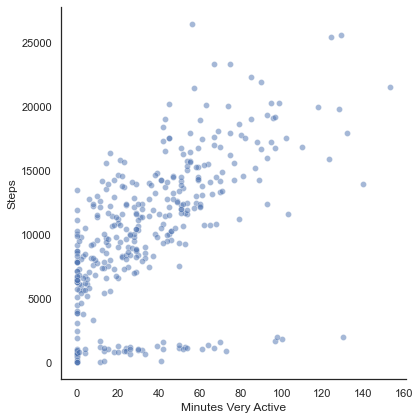

In [69]:
# Scatter plot of the 2 variables illustrates a moderately strong correlation
sns.relplot(x='Minutes Very Active', y='Steps', data=fitbit, alpha=.5, height=6)
plt.show()

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [ ]:
import matplotlib.pyplot as plt;

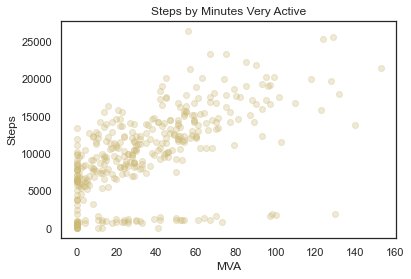

In [75]:
plt.scatter(x='Minutes Very Active', y='Steps', data=fitbit, c='y', alpha=.3)
plt.title('Steps by Minutes Very Active')
plt.xlabel('MVA')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
There is a strong correlation of the 2 variables on a portion of the dataset
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [80]:
# There seems to be no correlation between the 2 variables
fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method='pearson')fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method='pearson')

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

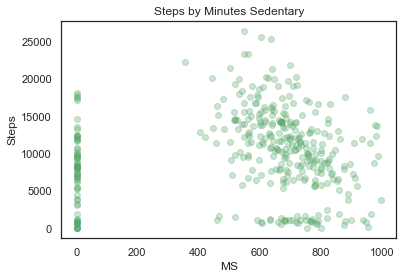

In [82]:
plt.scatter(x='Minutes Sedentary', y='Steps', data=fitbit, c='g', alpha=.3)
plt.title('Steps by Minutes Sedentary')
plt.xlabel('MS')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
The correlation coefficient is biased by the data cluster at MS=0:
there is a negative correlation between the 2 variables: the more sedentary minutes, the less steps.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [83]:
# There seems to be no correlation between the two variables
fitbit['MinutesOfSleep'].corr(fitbit['Steps'], method='pearson')

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

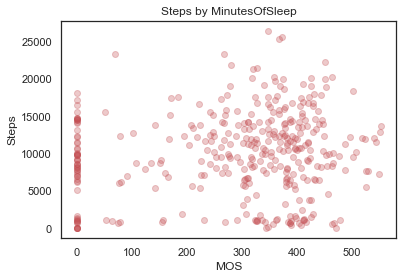

In [84]:
plt.scatter(x='MinutesOfSleep', y='Steps', data=fitbit, c='r', alpha=.3)
plt.title('Steps by MinutesOfSleep')
plt.xlabel('MOS')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
The 2 variables are independent
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [106]:
# Computing the correlation matrix
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[columns]

cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


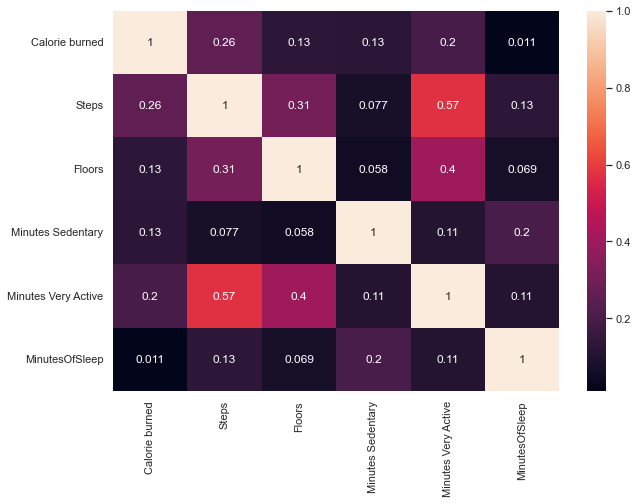

In [107]:
# Heatmap of correlation matrix may be easier to read
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cor_fit, annot=True)

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [116]:
cor_fit.sort_values(by='Steps', axis=0, ascending=False, 
                             inplace=True
                            )
cor_fit['Steps']

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [118]:
time_grades = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_5_ Pivot_Tables_and_Crosstab\Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

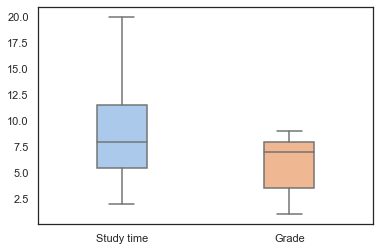

In [132]:
sns.boxplot(data=time_grades, width=.3, palette="pastel")
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [133]:
time_grades['Grade'].corr(time_grades['Study time'], method='pearson')

0.7980456073578858

In [135]:
time_grades['Grade'].corr(time_grades['Study time'], method='spearman')

0.819658753036942

In [ ]:
"""
Both correlation coefficients show very strong correlation
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

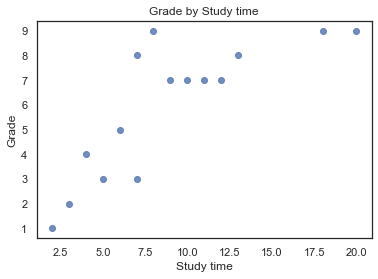

In [138]:
plt.scatter(x='Study time', y='Grade', data=time_grades, c='b', alpha=.8)
plt.title('Grade by Study time')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
There is a strong, positive, linear correlation between the two variables;
however the small size of the dataset makes it difficult to read it visually
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
I found these definitions but I am not sure to understand the difference;
hopefully we can address them in class!

Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

Spearman correlation: Spearman correlation evaluates the monotonic relationship. 
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
"""